# Lecture 3 : Scientific computing with Python

*November, 2021 - François HU*

*Master of Science in Artificial Intelligence Systems - EPITA*

*This lecture is available here: https://curiousml.github.io/*

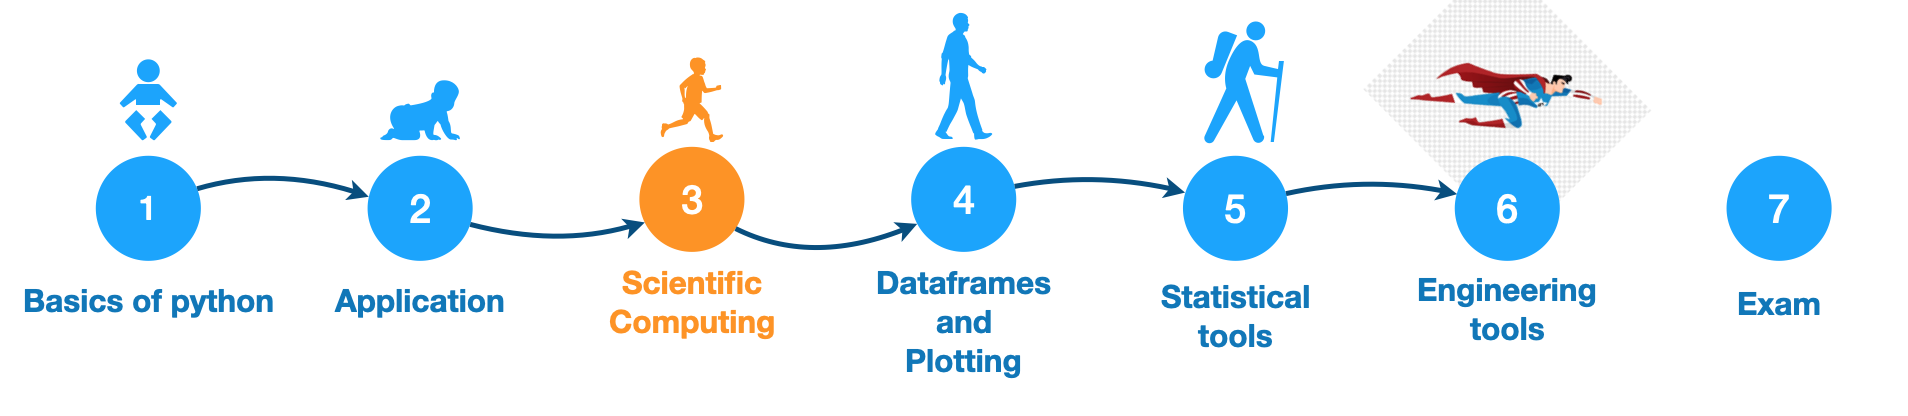

# Table of contents

[Introduction](#I)
1. [Introduction to NumPy](#1)
2. [Python List VS NumPy Array](#2)
3. [Array creation](#3)
4. [Array modification](#4)
5. [Indexing and slicing](#5)
6. [Operation on arrays](#6)
7. [Basic mathematics/statistics](#7)
8. [[optional] Basic linear algebra](#8)

[Exercices](#E)

# Introduction <a name="I"></a>

So far we have seen (almost) only built-in python objects. Let us now study some **external packages**: by providing additional tools, these packages can be seen as an "extention" of Python to specific domains such as software engineering, scientific computing, statistics or data science.

The present lecture is about scientific computing with python. In a nutshell, this course is centered on exploring the package [NumPy](https://numpy.org/) that provides both array manipulation tools for python and a collection of modules for various mathematical purposes.

**How to install a python package in [Ananconda](https://curiousml.github.io/teaching/install_python.html)?** You have access to pip and conda for installing packages from [The Python Package Index](https://pypi.org/) (PyPI) a repository of software for the Python programming language. For example let us install the package `NumPy`:

1. Open the anaconda prompt
2. the following command can be used to install any Python package from [PyPI](https://pypi.org/) in Anaconda :
```
pip install package_name
```
In order to install numpy, replace `package_name` by `numpy`


## 1. Introduction to NumPy <a name="1"></a>

NumPy (can be written as numpy) is the core library for scientific computing in Python. This package provides 

- a high-performance multidimensional array object, 
- tools for working with these arrays, including some fast operations on arrays
- and some (basic) mathematical functions such as `cos`, `sin`, `exp`, ...

A numpy array is a collection of items, all of the same type. As a recall, the Python core library provided Lists. A list is the Python equivalent of an array, but is resizeable and can contain elements of different types. We can find some similiraties with these two data types:

- Both are **ordered** collection of items (although in numpy array items must have the same data types);

- Both are enclosed in **[] brackets**;

- Both are **mutable**;

- Both can be used for **indexing** and **slicing** operations;

**Then why do we need bother studying numpy array ? Why not using the list instead ?** The answer is performance.

## 2. Python List VS NumPy Array <a name="2"></a>

- Numpy array outperform the lists in terms of **time** (faster) and **memory** (take up less space) **complexity**;

- the package numpy has optimized functions such as **linear algebra operations** built in;

- an array has a fixed size (definition at creation) while a list can grow dynamically;

- convenient to use for scientists as methods for arrays are **scientific oriented**;

- For **appending an item** into the collection, Python List is however faster than NumPy Array (O(1) VS O(N))

**Remark:** NumPy Arrays are recommended when working with longer sequences of homogenous data.

The following sections provide an introduction to NumPy.

Let us first import the package numpy and let us rename it as `np`

## 3. Array creation <a name="3"></a>

### From an existing list

you can transform a **list into an array** (and vice-versa) thanks to the function `array` of numpy.

In [2]:
# a list of lists
lst = [[1, 1], 
       [2, 20], 
       [100, 1]]

In [3]:
arr = np.array(lst)
print(arr)

[[  1   1]
 [  2  20]
 [100   1]]


In [4]:
# also true for empty list
print(np.array([]))

[]


### From numpy routines

One can also use some numy functions to create a numpy array with existing items (these items could be modified later). see the documentation for further details on the parameters.

- function `arange` which is quite similar to the built-in iterator `range`;

In [5]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

- function `zeros` or `ones`

In [6]:
np.zeros((5, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [7]:
np.ones((2, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

- other useful functions

In [8]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [9]:
np.diag([1, 1, 0])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [10]:
np.linspace(0, 1, num=9)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

We can also generate random values (of an array) with the sub module `random` of numpy:

In [11]:
type(np.random)

module

- random number between 0 (included) and 1 (excluded)

In [12]:
np.random.rand()

0.7949203786952924

- multidimensional array with random values (all between 0 and 1):

In [13]:
np.random.rand(3)

array([0.16332313, 0.37710931, 0.84774113])

In [14]:
np.random.rand(3, 2)

array([[0.78032709, 0.7271365 ],
       [0.34825408, 0.69350509],
       [0.97139169, 0.223825  ]])

In [15]:
np.random.rand(3, 2, 2)

array([[[0.3268954 , 0.39457184],
        [0.02758824, 0.8967342 ]],

       [[0.2443677 , 0.94021388],
        [0.97782996, 0.6786243 ]],

       [[0.40892151, 0.05205611],
        [0.87319043, 0.60872028]]])

multidimensional array with random integers betweeen `low` (inclusive) and `high` (exclusive)

In [16]:
np.random.randint(low=0, high=10, size=(2, 3))

array([[1, 9, 9],
       [9, 0, 3]])

In [17]:
# an alternative way
np.random.randint(0, 10, (2, 3))

array([[9, 3, 7],
       [7, 4, 3]])

If we want to regenerate the same random values, we have to set the random seed of the numpy pseudo-random number generator.

In [18]:
# without setting the seed
print(np.random.randint(0, 10, 5))
print(np.random.randint(0, 10, 5))
print(np.random.randint(0, 10, 5))

[8 3 7 3 8]
[4 1 9 0 0]
[8 8 5 2 1]


In [19]:
# with constant seed
np.random.seed(4) # we can use other number
print(np.random.randint(0, 10, 5))

np.random.seed(4)
print(np.random.randint(0, 10, 5))

np.random.seed(4)
print(np.random.randint(0, 10, 5))

[7 5 1 8 7]
[7 5 1 8 7]
[7 5 1 8 7]


### Information about an array object

These functions create an array object. After its initialization, it has some useful attributes

- `ndim`, the number of dimensions

In [20]:
arr.ndim

2

- `shape`, the shape (or dimension)

In [21]:
arr.shape

(3, 2)

- `size`, total number of items

In [22]:
arr.size

6

`dtype` the type of items

In [23]:
arr.dtype

dtype('int64')

## 4. Array modification <a name="4"></a>

### Shape modification

After its creation, you can **modify its shape** with many methods of array. One of the most popular is `resize`.

In [24]:
# toy example
A = np.arange(12)
print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [25]:
A.resize(4,3) # inplace operation

In [26]:
print(A)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [27]:
A.ravel()  # not inplace operation

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [28]:
A.resize(4,3)

if one want to "resize" or "ravel" an array object without modifying it but creating a copy, there are methods `reshape` and `flatten`.

In [29]:
# our toy example
B = np.arange(15)
B.resize(3,5)
print(B)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [30]:
print(B.reshape(5,3))
print(B)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [31]:
print(B.flatten())
print(B)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


Note that when we `reshape` an array object, we can omit one dimension (and replace the value by `-1`) and let the method compute the value of it.

In [32]:
print(B)
print(B.reshape(-1,3)) # instead of B.reshape(5,3)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


We can also transpose an array using the attribute `T`

In [33]:
print(B)
print(B.T) # instead of B.reshape(-1,3)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


### Repetition and concatenation

Arrays can also be **repeated** and **concatenated**. Let us recall `A` and `B` previously created

In [34]:
# toy examples
print(A)
print(B)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [35]:
# toy examples
C1 = np.ones((2, 3))
C2 = np.ones((3, 2))
print(C1)
print(C2)

[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [36]:
np.tile(A, (2, 3))  # 2 repetitions in line, 3 in column

array([[ 0,  1,  2,  0,  1,  2,  0,  1,  2],
       [ 3,  4,  5,  3,  4,  5,  3,  4,  5],
       [ 6,  7,  8,  6,  7,  8,  6,  7,  8],
       [ 9, 10, 11,  9, 10, 11,  9, 10, 11],
       [ 0,  1,  2,  0,  1,  2,  0,  1,  2],
       [ 3,  4,  5,  3,  4,  5,  3,  4,  5],
       [ 6,  7,  8,  6,  7,  8,  6,  7,  8],
       [ 9, 10, 11,  9, 10, 11,  9, 10, 11]])

In [37]:
np.concatenate((A, C1))

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [38]:
np.concatenate((B, C2), axis = 1)

array([[ 0.,  1.,  2.,  3.,  4.,  1.,  1.],
       [ 5.,  6.,  7.,  8.,  9.,  1.,  1.],
       [10., 11., 12., 13., 14.,  1.,  1.]])

These last two operations can also be done by stacking arrays vertically or horizontally.

In [39]:
np.vstack((A, C1))

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [40]:
np.hstack((B, C2))

array([[ 0.,  1.,  2.,  3.,  4.,  1.,  1.],
       [ 5.,  6.,  7.,  8.,  9.,  1.,  1.],
       [10., 11., 12., 13., 14.,  1.,  1.]])

## 5. Indexing and slicing <a name="5"></a>

As a list, array object can be indexed, sliced and iterated over.

### Basic indexing, slicing and iterating

- In 1D array

In [41]:
# toy examples
arr = np.random.randint(0, 100, 10)
print(arr)

[72 50  9 58 94 55 55 57 36 50]


In [42]:
# indexing
print(arr[0]) # print the first item (index 0) of the array
print(arr[-1]) # print the last item of the array
print(arr[4]) # print the 5th item (index 4) of the array

72
50
94


In [43]:
# slicing
print(arr[1:6]) # print the items between index 1 and index 6 (excluded) of the list l
print(arr[1:]) # print the items beginning at index 1 till the last items of the list l
print(arr[1:6:2]) # print the items between index 1 and index 6 (excluded) of the list l spaced by the 2 steps
print(arr[::-1]) # reverse the list

[50  9 58 94 55]
[50  9 58 94 55 55 57 36 50]
[50 58 55]
[50 36 57 55 55 94 58  9 50 72]


In [44]:
# assign some items by specifying the indices
print(arr) # old list
arr[0] = -1
print(arr) # new list

[72 50  9 58 94 55 55 57 36 50]
[-1 50  9 58 94 55 55 57 36 50]


In [45]:
arr[3:5] = [-2, -3]
print(arr)

[-1 50  9 -2 -3 55 55 57 36 50]


In [46]:
# iterate over the array
for i in np.linspace(0, 1, num=5):
    print(i**2, end="\t")

0.0	0.0625	0.25	0.5625	1.0	

- In 2D array or more

In [47]:
arr = np.random.randint(0, 100, (3, 4))
print(arr)

[[44 38 52  3]
 [ 0 55 21 21]
 [73 38 56 66]]


like lists, the first item of the array corresponds to the first row

In [48]:
arr[0]

array([44, 38, 52,  3])

like lists, the items in the grid can be accessed by

In [49]:
arr[0][1] # item in the first row (index 0) and second column (index 1)

38

alternatively, in numpy arrays we can use

In [50]:
arr[0, 1] # recommended for arrays!

38

In [51]:
# indexing in 2D
print(arr[0, 1])
print(arr[1, -1])

38
21


In [52]:
# slicing in 2D
print(arr[:2, 1:3]) # `:2` all items from the first index (0) to index 2
print(arr[1:, :2])  #`1:` all items from index 1 to the last index; 
print(arr[1:6:2, :]) # `:` means all
print(arr[::-1, :2])

[[38 52]
 [55 21]]
[[ 0 55]
 [73 38]]
[[ 0 55 21 21]]
[[73 38]
 [ 0 55]
 [44 38]]


### Advanced indexing with Arrays

There are two fancy way to index/slice your numpy array:
1. specify the wanted indices **with lists (or arrays)**
2. request the wanted indices **with booleans (in this context a.k.a masks)**

In [53]:
# toy example
arr = np.random.randint(0, 100, (5, 6))
print(arr)

[[46 30  8 49 66 58]
 [87 32 40 42 45 33]
 [32 28  3 79 98 95]
 [57 50 17 81 89 73]
 [59 48 76 23 94 22]]


1. **with lists**

In [54]:
ind_row = [0, 2, 4]
ind_col = [2, 5, 1]

print("first extract:")
print(arr[ind_row, :])
print("second extract:")
print(arr[:, ind_col])
print("third extract:")
print(arr[ind_row, ind_col])

first extract:
[[46 30  8 49 66 58]
 [32 28  3 79 98 95]
 [59 48 76 23 94 22]]
second extract:
[[ 8 58 30]
 [40 33 32]
 [ 3 95 28]
 [17 73 50]
 [76 22 48]]
third extract:
[ 8 95 48]


In [55]:
# same as arr[ind_row, ind_col]
print(arr[[0, 2, 4], [2, 5, 1]])
print(arr[np.array([0, 2, 4]), np.array([2, 5, 1])])

[ 8 95 48]
[ 8 95 48]


2. **with booleans**

In numpy array, it is possible to compare a numpy array with a scalar (integer for example).

In [56]:
arr > 30

array([[ True, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True, False, False,  True,  True,  True],
       [ True,  True, False,  True,  True,  True],
       [ True,  True,  True, False,  True, False]])

We can consider these values as a mask:

In [57]:
# let's save it as indexes
ind = (arr > 30)

In [58]:
# extract items with values > 30
arr[ind]

array([46, 49, 66, 58, 87, 32, 40, 42, 45, 33, 32, 79, 98, 95, 57, 50, 81,
       89, 73, 59, 48, 76, 94])

This method is quite useful for assignments

In [59]:
arr > 30 

array([[ True, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True, False, False,  True,  True,  True],
       [ True,  True, False,  True,  True,  True],
       [ True,  True,  True, False,  True, False]])

In [60]:
print(arr)
arr[arr > 30] = -1
print(arr)

[[46 30  8 49 66 58]
 [87 32 40 42 45 33]
 [32 28  3 79 98 95]
 [57 50 17 81 89 73]
 [59 48 76 23 94 22]]
[[-1 30  8 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 28  3 -1 -1 -1]
 [-1 -1 17 -1 -1 -1]
 [-1 -1 -1 23 -1 22]]


**Useful numpy methods:** `where`, `any` all `all`

In [87]:
# toy example
arr = np.random.randint(0, 100, (5, 6))
print(arr)

[[96 67 53 22 17 27]
 [97 60 43 86 15 13]
 [ 0 10  7 63 79 59]
 [52 52 64 87 97 46]
 [42 49 31 35 30 65]]


In [92]:
# Test if a line has at least one value less than 15
print(np.any(arr < 15, axis=0))  

[ True  True  True False False  True]


In [93]:
# Indices where arr is less than 15
indx, indy = np.where(arr < 15)
print(indx, indy)

[1 2 2 2] [5 0 1 2]


In [94]:
print(arr[indx, indy])

[13  0 10  7]


## 6. Operation on arrays <a name="6"></a>

In numpy, operations on arrays are elementwise. The result is returned in a new array.

### Basic operations

- between two arrays (of same size)

In [64]:
# toy examples
# arr1 and arr2 must be the same size
arr1 = np.arange(1, 15, 3)
arr2 = np.arange(1, 10, 2)
print(arr1)
print(arr2)
print("operations:")
print(arr1 + arr2)
print(arr1 * arr2)
print(arr1 ** arr2)
print(arr1 / arr2)
print(arr1 % arr2)
print(arr1 <= arr2)

[ 1  4  7 10 13]
[1 3 5 7 9]
operations:
[ 2  7 12 17 22]
[  1  12  35  70 117]
[          1          64       16807    10000000 10604499373]
[1.         1.33333333 1.4        1.42857143 1.44444444]
[0 1 2 3 4]
[ True False False False False]


- between an array and a value

In [65]:
# toy example
arr = np.arange(1, 15, 3)
print(arr)
print("operations:")
print(arr + 2) # different from list ! for a list we have an ERROR
print(arr * 2) # different from list ! for a list we duplicate the list
print(arr ** 2) # different from list ! for a list we have an ERROR
print(arr / 2) # different from list ! for a list we have an ERROR
print(arr % 2) # different from list ! for a list we have an ERROR
print(arr <= 5) # different from list ! for a list we have an ERROR

[ 1  4  7 10 13]
operations:
[ 3  6  9 12 15]
[ 2  8 14 20 26]
[  1  16  49 100 169]
[0.5 2.  3.5 5.  6.5]
[1 0 1 0 1]
[ True  True False False False]


This approach is called **broadcasting**.

### Broadcasting

One of the most advanced feature of numpy array is **broadcasting**: the possibilty to do operations with arrays of different shapes with fast implementations.

The main rule of broadcasting is that the dimensions of two arrays are compatible when:
1. they are equal;
2. one of them is 1;
3. one of them is a value/scalar (see above).
In the second case, numpy operates as though the items in the axis of dimension 1 were identically repeated to meet the dimension of the other array.

**Example for the following arrays:**

In [66]:
# toy examples
arr1 = np.random.randint(0, 10, (2, 3)) # two dimensions
arr2 = np.arange(1, 4) # one dimension
print(arr1)
print(arr2)

[[3 7 8]
 [2 6 7]]
[1 2 3]


In [67]:
print("brodcasting:")
print(arr1 + arr2)
print(arr1 - arr2)
print(arr1 * arr2)
print(arr1 ** arr2)
print(arr1 / arr2)
print(arr1 % arr2)
print(arr1 <= arr2)

brodcasting:
[[ 4  9 11]
 [ 3  8 10]]
[[2 5 5]
 [1 4 4]]
[[ 3 14 24]
 [ 2 12 21]]
[[  3  49 512]
 [  2  36 343]]
[[3.         3.5        2.66666667]
 [2.         3.         2.33333333]]
[[0 1 2]
 [0 0 1]]
[[False False False]
 [False False False]]


## 7. Basic mathematics/statistics <a name="7"></a>

As stated in the introduction, a major feature of numpy is to provide mathematical methods with fast implementations.

### Operations

In [68]:
# toy example
arr = np.arange(1, 5)
print(arr)

[1 2 3 4]


- basic operations: `sum`, `prod`and `cumsum`

In [69]:
print(arr.sum())
print(arr.prod())
print(arr.cumsum())

10
24
[ 1  3  6 10]


- `mean` and `std`

In [70]:
print(arr.mean())
print(arr.std())

2.5
1.118033988749895


- `min` and `max`

In [71]:
print(arr.min())
print(arr.max())

1
4


- `argmin` and `argmax`

In [72]:
print(arr.argmin())
print(arr.argmax())

0
3


- useful tip: sorting is simple with python

In [73]:
u = np.array([4, 3, 6, 5, 9])
u.sort()  # Sorting is an inplace operation
print(u)

[3 4 5 6 9]


- We note that for multidimensional array, we can specify the axis of operation

In [74]:
# toy example
arr = np.arange(1, 13).reshape(3, 4)
print(arr)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [75]:
print("operations for axis 0")
print(arr.sum(axis=0)) # Axis or axes along which a sum is performed.
print(arr.prod(axis=0))
print(arr.cumsum(axis=0), end="\n\n")
print("operations for axis 1")
print(arr.mean(axis=1))
print(arr.std(axis=1), end="\n\n")
print("operations on all items of the array")
print(arr.min())
print(arr.max())

operations for axis 0
[15 18 21 24]
[ 45 120 231 384]
[[ 1  2  3  4]
 [ 6  8 10 12]
 [15 18 21 24]]

operations for axis 1
[ 2.5  6.5 10.5]
[1.11803399 1.11803399 1.11803399]

operations on all items of the array
1
12


### Mathematical functions

Numpy provides some functions like `cos`, `sin`, `exp` or `log` (see [Universal functions](https://numpy.org/doc/stable/reference/ufuncs.html#ufunc) for more built-in functions). It also provides constants such as $\pi$.

In [76]:
x = np.linspace(0, np.pi/2, num=4)
print(x)
print(np.cos(x))
print(np.sin(x))
print(np.exp(x))

[0.         0.52359878 1.04719755 1.57079633]
[1.00000000e+00 8.66025404e-01 5.00000000e-01 6.12323400e-17]
[0.        0.5       0.8660254 1.       ]
[1.         1.68809179 2.84965391 4.81047738]


## 8. [optional] Basic linear algebra <a name="8"></a>

As stated before, numpy provides many efficient [linear algebra](https://numpy.org/doc/stable/reference/routines.linalg.html) operations. **Fun fact**: numpy has built-in Matrix object but users generally prefer to handle arrays with routines from linear algebra. Some examples are provided below:

In [77]:
# toy examples
u = 2 * np.ones(5)
v = np.arange(5)
A = np.diag([0.3, -0.3, 1, 2, 3])
print(u)
print(v)
print(A)

[2. 2. 2. 2. 2.]
[0 1 2 3 4]
[[ 0.3  0.   0.   0.   0. ]
 [ 0.  -0.3  0.   0.   0. ]
 [ 0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   2.   0. ]
 [ 0.   0.   0.   0.   3. ]]


In [78]:
# dot product
print(u.dot(v))

20.0


In [79]:
# outer product
B = np.outer(u, v)
print(B)

[[0. 2. 4. 6. 8.]
 [0. 2. 4. 6. 8.]
 [0. 2. 4. 6. 8.]
 [0. 2. 4. 6. 8.]
 [0. 2. 4. 6. 8.]]


In [80]:
# Matrix product, different from A*B !
C = A.dot(B)
print(C)

[[ 0.   0.6  1.2  1.8  2.4]
 [ 0.  -0.6 -1.2 -1.8 -2.4]
 [ 0.   2.   4.   6.   8. ]
 [ 0.   4.   8.  12.  16. ]
 [ 0.   6.  12.  18.  24. ]]


In [81]:
# transpose of C
print(C.T)

[[ 0.   0.   0.   0.   0. ]
 [ 0.6 -0.6  2.   4.   6. ]
 [ 1.2 -1.2  4.   8.  12. ]
 [ 1.8 -1.8  6.  12.  18. ]
 [ 2.4 -2.4  8.  16.  24. ]]


In [82]:
# Toy example C
C = np.random.rand(5, 5)
C = C.dot(C.T) # for the sake of the lecture we include this step in order to ensure that the inverse exist

In [83]:
# Eigenvalues of C
print(np.linalg.eigvals(C))

[7.08705859e+00 8.73156145e-01 5.05139841e-01 4.36313066e-03
 2.61068922e-02]


In [84]:
# inverse of C
invC = np.linalg.inv(C)
I = invC.dot(C)
I[I < 1e-10] = 0  # Erase numerical errors before printing

print(I)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Exercices <a name="E"></a>

## Exercice 1.

Generate the following arrays thanks to numpy methods and **without explicit loops** and **without manually fill in all the numbers** (let us name them respectively `arr1`, `arr2` and `arr3`):
```
[[ 0  4  8 12 16]
 [ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]]
```

```
[[ 0  1  4  9 16]
 [ 1  4  9 16 25]
 [ 4  9 16 25 36]
 [ 9 16 25 36 49]]
```

```
[[0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]]
```

## [optional] Exercice 2.

Standardize each array (`arr1`, `arr2` and `arr3`) such that for each array:
- the mean of each column is $0$ 
- and the standard deviation of each column is $1$.

## Exercice 3.

From `arr1` extract the submatrix:

```
[[ 6 18 10]
 [ 7 19 11]
 [ 5 17 9]]
```

## Exercice 4.

Replace all the items with value 0 of `arr3` by -1

## Exercice 4 bis

Create a random vector of size 20 (all values between $[0, 1)$) and replace:
- the maximum value by $-1$ 
- and the second maximum value by $-2$

## [optional] Exercice 5.

Let $A$ be a matrix and $b$ be a vector defined by:

    >>> V = np.random.rand(3, 3)
    >>> A = V + V.T
    >>> b = np.random.rand(3)

Solve the linear system $Ax = b$.